###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 Lorena A. Barba, Tingyu Wang

# Transform all the vectors

This is the first lesson in the module titled **"Land on Vectors Spaces"**, for learning practical linear algebra with Python. We take a visual and intuitive approach to illuminate some of the core ideas in linear algebra, enabled by computing. 

Linear algebra is a surprisingly useful subject, at the heart of computer graphics, cryptography, and machine learning. It is applied in data compression, game theory, and understanding networks. Engineering applications of linear algebra are everywhere: electric circuits, statics and dynamics, digital signal processing, optimization, robotics, multi-body dynamics… you name it!

Whether you missed out on taking a college linear algebra course, or you did so a long time ago and need a refresher, this learning module can be your launching pad to the wonderful world of _vector spaces_.

Let's get started! We will be using our favorite libraries of the Python ecosystem: NumPy and Matplotlib. We also have a few helper functions in the `plot_helper.py` script, which will make it easy to visualize the ideas in these lessons. 
Go ahead and load these by executing the next two cells.

In [1]:
import numpy
%matplotlib inline
from matplotlib import pyplot

In [2]:
import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

## What's a vector?

Vectors are everywhere: physics, engineering, mathematics, computer science, video games, and more. Each field's interpretation of what a vector *is* may be different, but  vectors live a similar life in every space.

The first episode in the wonderful video series, [_"Essence of Linear Algebra"_](http://3b1b.co/eola) tells you of three different ideas about vectors [1]:

1. For physicists, a vector is an "arrow" of a given length (magnitude) and direction. It can represent directional quantities like velocity, force, acceleration.
2. For computer scientists, a vector is an ordered list of numbers. It can represent a set of variables or features stored in order.
3. For mathematicians, vectors are generic objects that behave a certain way when they are added or scaled:  $\mathbf{u}+\mathbf{v}$, $\alpha\mathbf{v}$.

<img src="../images/whatsavector.png" style="width: 500px;"/> 
#### How you think of a vector depends on who you are...

In physics, vectors are almost always two- or three-dimensional (although in some fancy branches of physics they do go to higher dimensions). Vectors help physicists describe things like motion and electro-magnetic fields on a plane or in physical 3D space.

In computer science and in data science, vectors are often multi-dimensional, that is, they have many components. They contain a set of ordered variables in a data model, like for example: the age, weight, daily hours of sleep, weekly hours of exercise, and blood pressure of an individual (five dimensions).

Let's start with the idea of a vector as an "arrow" (magnitude plus direction). We visualize a vector by placing this arrow with its tail at the origin of a coordinate system.
But changing the position of the tail doesn't change the vector's magnitude or direction, so the vector is the same no matter where we draw it. 

In the code cell below, we define a list with a single vector of coordinates $(2, 2)$, and we use our custom function `plot_vector()` to plot the vector with its tail at four different positions on a 2D coordinate system. 

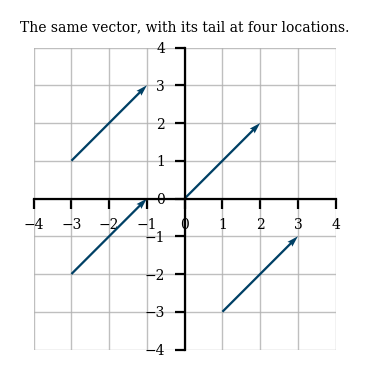

In [3]:
vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
pyplot.title("The same vector, with its tail at four locations.");

In the 2D plane, we can see clearly the connection between the "arrow" idea of vector, and the "list of numbers," which in this case represents the coordinates of the arrow head when the tail is at the origin of the coordinate system.

The first coordinate designates the horizontal distance between head and tail, and the second coordinate designates the vertical distance between head and tail. We typically will denote horizontal and vertical axes as $x$ and $y$.

In three dimensions, $x$ and $y$ are usually denoting the perpendicular axes on the horizontal plane, and the vertical axis is denoted by $z$. A 3D vector thus has three components: $(x, y, z)$.

##### Note:

Our helper function `plot_vector()` takes one or two lists as arguments: a list of vectors, and a list of tails (optional). It can plot one vector with its tail on several locations, or several vectors with their tail at one location. It can also plot several vectors with their tails at different locations, but in that case, the two lists have to match in length (if they don't, the function will give an error).

##### Exercise:

In a new code cell, create a list of vectors (either as tuples of coordinates, or as NumPy arrays), and plot them. The default tail position is the origin. Then create a list of tail positions, and plot the same vectors again at these positions.

## Fundamental vector operations

Two operations are the foundation of everything: **vector addition**, and **multiplication by a scalar** (i.e., scaling).

Let's first visualize vector addition. Suppose we have two vectors: 

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad  
   \mathbf{b} = \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] 
$$

We can visualize vector addition as follows: draw vector $\mathbf{a}$ with its tail at the origin; then draw vector $\mathbf{b}$ with its tail on the head of $\mathbf{a}$. If you now draw a vector from the origin to the head of $\mathbf{b}$, that vector is $\mathbf{a} + \mathbf{b}$.

With our helper function for plotting 2D vectors, it looks like this:

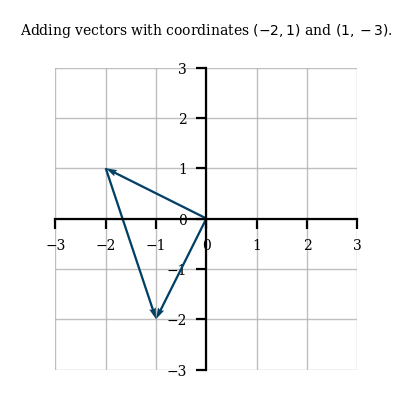

In [4]:
# vector addition
a = numpy.array((-2,1))
b = numpy.array((1,-3))
origin = numpy.array((0,0))

vectors = [a, b, a+b]
tails   = [origin, a, origin]
plot_vector(vectors, tails)
pyplot.title("Adding vectors with coordinates $(-2, 1)$ and $(1,-3)$.\n");

In this visualization of vector addition, the head of $\mathbf{a} + \mathbf{b}$ ends up at the coordinates  resulting from adding the tail-to-head horizontal and vertical distances of $\mathbf{a}$ and $\mathbf{b}$. In other words, from adding the respective coordinates:

$$
   \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] +  
   \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] =
   \left[ \begin{array}{c} -2+1 \\ 1-3  \end{array} \right]
$$


Let's now look at multiplication by a scalar: essentially, the length of the vector is *scaled* by the scalar factor. If you multiply a vector by $2$, its length (magnitude) doubles. 

For example, if we scale by $2$ the vector $\mathbf{c} = \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$, it looks like this:

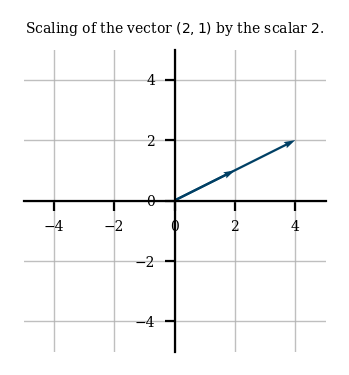

In [5]:
# vector scaling
c = numpy.array((2,1))
vectors = [c, 2*c]
plot_vector(vectors)
pyplot.title("Scaling of the vector $(2,1)$ by the scalar $2$.");

The head of the vector $2\mathbf{c}$ ends up at the coordinates resulting from scaling the tail-to-head horizontal and vertical distances of $\mathbf{c}$:

$$
  2\cdot\left[ \begin{array}{c} 2 \\ 1  \end{array} \right] =
  \left[ \begin{array}{c} 2\cdot 2 \\ 2\cdot 1  \end{array} \right]
$$

##### Exercise:

_What is the effect of multiplying a vector by a negative scalar?_ Try it! Multiply the vector $\mathbf{c}$ by a negative scalar and visualize both vectors using our `plot_vector()` function.

## Basis vectors

With the ideas of vector addition and multiplication by a scalar fresh in your mind, now imagine this. Any horizontal vector (i.e., having zero as its second component) can be scaled to have length $1$. 

For example, the vector $\,\mathbf{u} = \left[ \begin{array}{c} u \\ 0  \end{array} \right]$ scaled by $1/u$ becomes $\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$.

Similarly, any vertical vector (having zero as its first component) can be scaled to have length $1$.

Going the opposite way, 
- scaling the vector $\,\mathbf{i}=\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$ can give us all possible horizontal vectors, and 
- scaling the vector $\,\mathbf{j}=\left[ \begin{array}{c} 0 \\ 1  \end{array} \right]$ can give us all possible vertical vectors. 

Since every vector is the sum of a horizontal and a vertical one, it means we can generate *all vectors* by adding scaled versions of $\mathbf{i}$ and $\mathbf{j}$. That's why they are called **basis vectors**.

For any vector, its components are the scalars we need to multiply the basis vectors by to generate it. For example:

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

Let's visualize this using our helper function.

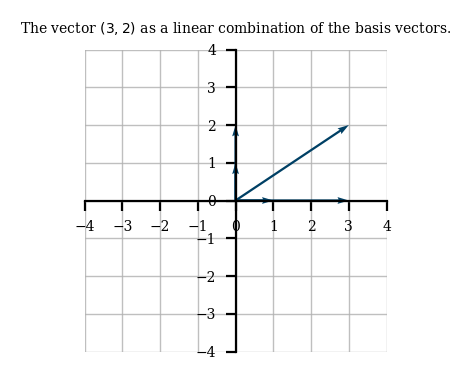

In [6]:
# basis vector
i = numpy.array((1,0))
j = numpy.array((0,1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)
pyplot.title("The vector $(3,2)$ as a linear combination of the basis vectors.");

## Linear combination and span

Adding two vectors that were each multiplied by a scalar is called a **linear combination** of those two vectors. Thus, we say that every vector is some linear combination of the basis vectors.

This brings us to the idea of the **span** of two vectors: the set of all possible linear combinations of the two. The second episode of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) uses rich visuals to bring these ideas to life [2]. Recommended!


In the code cells below, we will use the NumPy function [`randint`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) to get random integers in an interval (in this case, from $-10$ to $10$). We then create a list of 30 random vectors on the plane via a linear combination of the basis vectors $\mathbf{i}$ and $\mathbf{j}$, and we draw them all.  

In [7]:
from numpy.random import randint

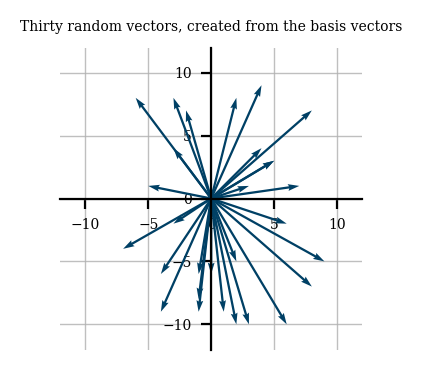

In [8]:
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
pyplot.title("Thirty random vectors, created from the basis vectors");

You can imagine that if we created more and more random vectors in this way, eventually we will fill up the 2D plane. Indeed, the *span* of the basis vectors is the whole 2D space. 

What if we tried the same experiment, but making linear combinations of the vectors $\mathbf{a}$ and $\mathbf{b}$, defined above?

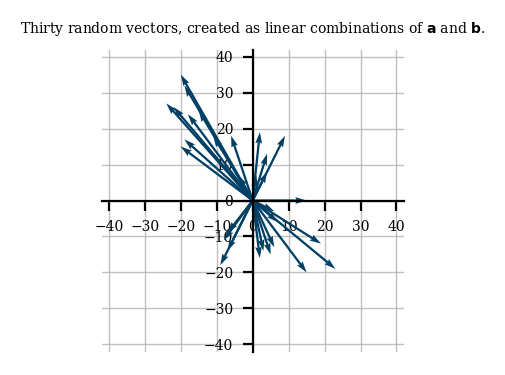

In [9]:
vectors = []
for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*a + n*b)
    
plot_vector(vectors)
pyplot.title("Thirty random vectors, created as linear combinations of $\mathbf{a}$ and $\mathbf{b}$.");

In fact, we can *still* fill up the whole plane with infinite linear combinations of $\mathbf{a}$ and $\mathbf{b}$—they span the full 2D space. We're not forced to use the unit vectors $\mathbf{i}$ and $\mathbf{j}$ as our basis vectors: other pairs of vectors could form a basis. With $\mathbf{i}$ and $\mathbf{j}$, we saw that the components of a vector $\mathbf{v}$ are the scalars needed in its corresponding linear combination of the basis vectors. If we were to use another pair of vectors as basis, we would need a different pair of scalars in the linear combination to get the same vector: we are _changing the coordinate system_.

Let's see another situation... we'll make linear combinations of the vector $\mathbf{a}$, and a new vector, $\mathbf{d} = \left[ \begin{array}{c} -1 \\ 0.5  \end{array} \right]$,

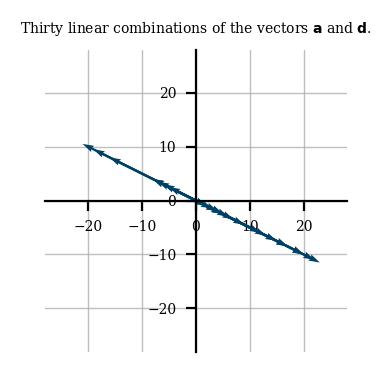

In [10]:
d = numpy.array((-1,0.5))
vectors = []
for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*a + n*d)
    
plot_vector(vectors)
pyplot.title("Thirty linear combinations of the vectors $\mathbf{a}$ and $\mathbf{d}$.");

*What's going on?*

Well, the new vector $\mathbf{d}$ happens to be a scaled version of the original vector $\mathbf{a}$—we say that they are _colinear_. Thus, all linear combinations of $\mathbf{a}$ and $\mathbf{d}$ end up on one line, which is their span. Their combinations are not able to travel all over the plane!

##### Definition:

> A **basis** for a vector space is a set of _linearly independent_ vectors that _span_ that space.

We saw above that $\mathbf{d}$ is a scalar multiplied by $\mathbf{a}$: it is linearly _dependent_ with $\mathbf{a}$. The vector $\mathbf{b}$, however, is linearly independent with $\mathbf{a}$. Bring in vector $\mathbf{c}$ now: it can be written as a linear combination of $\mathbf{a}$ and $\mathbf{b}$: $\alpha\, \mathbf{a} + \beta\, \mathbf{b} = \mathbf{c}$, for some scalars $\alpha$ and $\beta$. In 2D space, any third vector will be linearly dependent with $\mathbf{a}$ and $\mathbf{b}$: these two form a _full set_ of independent vectors (and a basis).

In 3D space, two vectors that are linearly independent span a plane. We need a third vector that is not a linear combination of the first two to span the whole space, and form a basis. Any fourth vector will be linearly dependent as it can be written as a linear combination of the basis vectors.

##### Key idea:

> In a set of linearly independent vectors, no one vector can be written as a linear combination of the others. The only way to get the zero vector from a linear combination of all the vectors is to multiply them all by zero.

**Note**: Plotting 30 vectors can result in a messy figure. When we want to visualize many vectors like this, we can simplify the plot by only showing the tip (head) of the vector, as a point on the plane. We'll do that from now on.

## What's a matrix?

In many books, they'll tell you that a matrix is a "table" of numbers, ordered in rows and columns. Maybe that's enough for some people, but you will get a kick out of _seeing_ what a matrix does!

Let's remember our friendly vectors from above:

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad  
   \mathbf{b} = \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] 
$$

Our little experiment with 30 random linear combinations of $\mathbf{a}$ and $\mathbf{b}$ helped us visualize that they can span the 2D space, and nothing is stopping us from using them as a basis if we so desire.

Remember also our vector $\mathbf{c} = \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$. Choosing $\mathbf{i}$ and $\mathbf{j}$ as a basis, then $\mathbf{c} = 2\,\mathbf{i} + 1\,\mathbf{j}$.

Now imagine that we use the components of $\mathbf{c}$ to make a linear combination of $\mathbf{a}$ and $\mathbf{b}$:

$$
 2\,\mathbf{a} + 1\,\mathbf{b} =
 2\cdot\left[ \begin{array}{c} -2 \\ 1  \end{array} \right] +
 1\cdot\left[ \begin{array}{c} 1 \\ -3  \end{array} \right] = 
  \left[ \begin{array}{c} -3 \\ -1  \end{array} \right]
$$

This is a new vector, let's call it $\mathbf{c}^\prime$: 

- it has components $\left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$ in the $\mathbf{a}$, $\mathbf{b}$ system of coordinates, and 
- it has components
$\left[ \begin{array}{c} -3 \\ -1  \end{array} \right]$ in the $\mathbf{i}$, $\mathbf{j}$ system of coordinates.

This will blow your mind. Arrange the vectors $\mathbf{a}$ and $\mathbf{b}$ as the columns of a matrix, and you'll see that:

$$
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ 1  \end{array} \right] =
  \left[ \begin{array}{c} -3 \\ -1  \end{array} \right]
$$

The matrix $\,A=\begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix} $  when multiplied by the vector $\mathbf{c}$ gives the vector $\mathbf{c}^\prime$.

##### Key idea:

> The matrix $A$ represents the **linear transformation** that takes vector $\mathbf{c}$ and transforms it into $\mathbf{c}^\prime$.

Let's play around with this a bit more.

We can define a NumPy array to represent the matrix $A$, as follows:

In [11]:
A = [[-2,1], [1,-3]]
A = numpy.array(A)
print(A)

[[-2  1]
 [ 1 -3]]


We can use the NumPy [`dot()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) method to multiply the matrix $A$ and the vector $\mathbf{c}$:

In [12]:
A.dot(c)

array([-3, -1])

Sure enough, this gives the vector $\mathbf{c}^\prime$. Now let's see what happens when we multiply the matrix $A$ with the basis vectors $\mathbf{i}$ and $\mathbf{j}$:

In [13]:
A.dot(i)

array([-2,  1])

In [14]:
A.dot(j)

array([ 1, -3])

Woot! The matrix $A$ when multiplied by the vector $\mathbf{i}$ gives the vector $\mathbf{a}$ and when multiplied by the vector $\mathbf{j}$ gives the vector $\mathbf{b}$.

Remember that we used the components of $\mathbf{c}$ in a linear combination of $\mathbf{a}$ and $\mathbf{b}$ to get $\mathbf{c}^\prime$: $2\,\mathbf{a} + 1\,\mathbf{b}$.
What we find is that the linear transformation represented by the matrix $A$, transforms the vector $\mathbf{c}$ to the linear combination of the transformed $\mathbf{i}$ and $\mathbf{j}$.

Since _all_ vectors are a linear combination of the basis vectors, $\mathbf{i}$ and $\mathbf{j}$, scaled by the vector components, they are _all_ transformed to a linear combination of $\mathbf{a}$ and $\mathbf{b}$ with the same scalars.

Let's try to visualize that. Our helpful custom function `plot_linear_transformation()` draws a grid of points on the plane, then applies the linear transformation described by the matrix argument, and plots the transformed grid. This is what $A$ does to the grid:

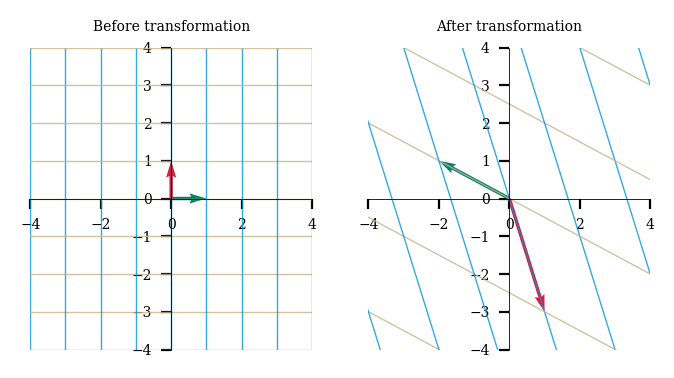

In [15]:
plot_linear_transformation(A)

##### Key idea:

> A **linear transformation** keeps the origin in place and transforms straight lines to straight lines.

The third episode of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) uses wonderful animations to illustrate the idea of matrices as linear transformations [3].

Let's practice with another example. Consider the matrix:

$$ M = \begin{bmatrix} 1 & 2 \\
                      2 & 1 \end{bmatrix} $$

The first column corresponds to the vector where $\mathbf{i}$ lands after the transformation, and the second column is where $\mathbf{j}$ lands:
$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

Any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$, is transformed to: 

$$
  x \left[ \begin{array}{c} 1 \\ 2  \end{array} \right] + 
  y \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]
$$

In [16]:
M = [[1,2], [2,1]]
M = numpy.array(M)
print(M)

[[1 2]
 [2 1]]


In [17]:
M.dot(i)

array([1, 2])

In [18]:
M.dot(j)

array([2, 1])

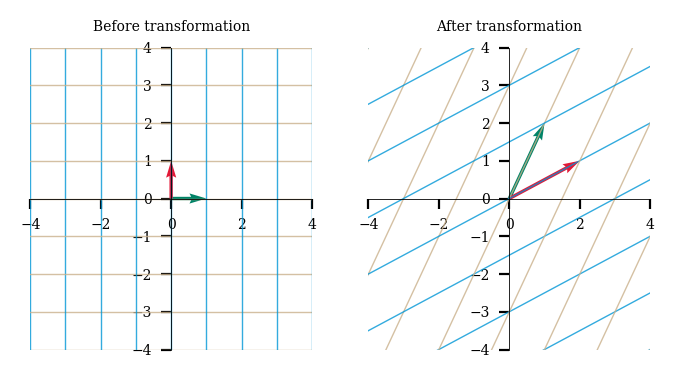

In [19]:
plot_linear_transformation(M)

To see what the transformation does to one particular vector, we can use our custom function `plot_vector` again, using the vector and its transformed self. Try several different ones…

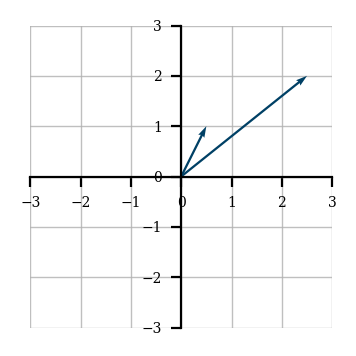

In [20]:
x = numpy.array((0.5,1))

vectors = [x, M.dot(x)]
plot_vector(vectors)

##### Note:

When we represent a matrix in Python using the NumPy array data type, we define it by listing the **rows** of the matrix. We didn't emphasize this in the examples above, where we chose matrices whose rows matched the columns! But that's just a coincidence. Look at another case:

In [21]:
N = numpy.array([[1,2],[5,6]])
print(N)

[[1 2]
 [5 6]]


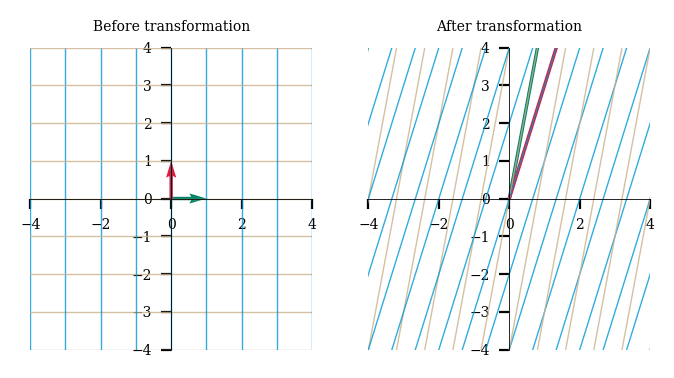

In [22]:
plot_linear_transformation(N)

##### Exercise:

Create a $2\times2$ matrix of your choosing (as a NumPy array of the row list), print it, then multiply it by the basis vectors $\mathbf{i}$ and $\mathbf{j}$, and finally visualize it using our helper function `plot_linear_transformation()`.

## Matrix-vector multiplication

Consider again the matrix $A$ defined above. As a linear transformation, it transforms any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ , to: 
$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

Since applying the linear transformation *is* computing the matrix-vector multiplication $A\mathbf{x}$, we see that matrix-vector multiplication is a combination of the matrix columns scaled by the vector components:

$$
   A\mathbf{x} = x\,\mathbf{a} + y\,\mathbf{b}
$$
where the vectors $\mathbf{a}$ and $\mathbf{b}$ are the columns of $A$.

##### Key idea:

> The matrix-vector multiplication $A\mathbf{x}$ is a linear combination of the columns of $A$ scaled by the components of $\mathbf{x}$.

This is also the case in 3 dimensions. Consider the matrix $B$ and the vector $\mathbf{y}=\left[ \begin{array}{c} x \\ y \\z \end{array} \right]$

$$ B = \begin{bmatrix} 1 & 2 & 4\\
                       2 & 1 & -1\\
                       0 & 3 & 1 \end{bmatrix} $$

$$ B\mathbf{y} = x\left[ \begin{array}{c} 1 \\ 2 \\0 \end{array} \right] + 
                 y\left[ \begin{array}{c} 2 \\ 1 \\3 \end{array} \right] + 
                 z\left[ \begin{array}{c} 4 \\ -1 \\1 \end{array} \right] 
$$

## Some special transformations

### Rotation

Imagine that you want a transformation that takes any vector and rotates it 90 degrees to the left. You can visualize that the unit vectors need to be transformed as follows:

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} -1 \\ 0 \end{bmatrix}
$$

That means that the matrix that transforms all vectors by a left 90-degree **rotation** is:

$$ R = \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix} $$

The rotation of any vector $\mathbf{x}$ is the multiplication $R\mathbf{x}$.

### Shear

Another special transformation turns every square into a diamond shape by leaving $\mathbf{x}$ unchanged, and transforming $\,\mathbf{j}$ so its tip falls on the coordinates $(1,1)$: 

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

This transformation is often called **shear**, and the matrix is:


$$ S = \begin{bmatrix} 1 & 1 \\
                       0 & 1 \end{bmatrix} $$

The shear of any vector $\mathbf{x}$ is the multiplication $S\mathbf{x}$.

Let's define these matrices as NumPy arrays, then use our helper function to visualize the corresponding transformation.

In [23]:
rotation = numpy.array([[0,-1], [1,0]])
print(rotation)

[[ 0 -1]
 [ 1  0]]


In [24]:
shear = numpy.array([[1,1], [0,1]])
print(shear)

[[1 1]
 [0 1]]


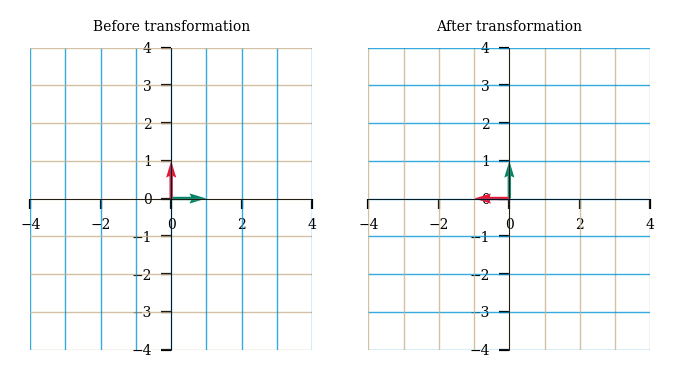

In [25]:
plot_linear_transformation(rotation)

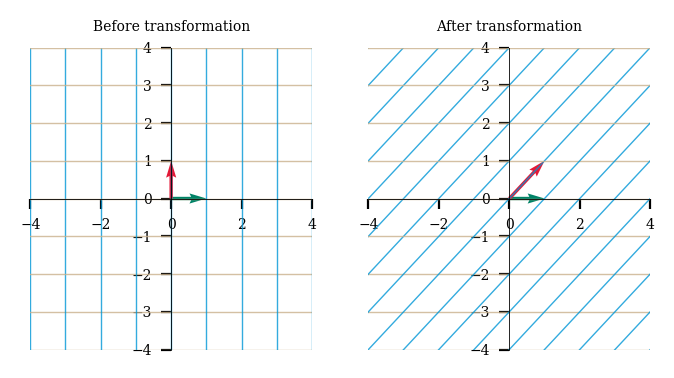

In [26]:
plot_linear_transformation(shear)

### Scaling

A **scaling** transformation doesn't rotate or shear the basis vectors, but scales them in length. For example, a transformation that elongates $\mathbf{i}$ but shrinks $\mathbf{j}$ could do:


$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 0 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 0.5 \end{bmatrix}
$$

Look at what the matrix transformation does in this case…

[[2.  0. ]
 [0.  0.5]]


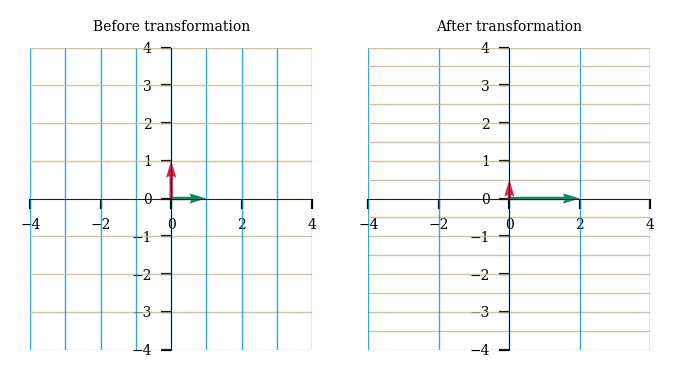

In [27]:
scale = numpy.array([[2,0], [0,0.5]])
print(scale)
plot_linear_transformation(scale)

The common structure of scaling matrices is that they have non-zero values in the diagonal, but zero values elsewhere.
One special scaling matrix leaves the lengths of the basis vectors unchanged: it is called the **identity** matrix:


$$ I = \begin{bmatrix} 1 & 0 \\
                       0 & 1 \end{bmatrix} $$

NumPy creates identity arrays of any size with [`numpy.identity()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html?highlight=eye#numpy.eye), passing the dimension (number of rows and columns) as argument. In the 2D case:

In [28]:
I = numpy.identity(2)
print(I)

[[1. 0.]
 [0. 1.]]


##### Exercise:

Create a rotation matrix that rotates every vector 90 degrees clockwise, then visualize the transformation with our helper function.

## Matrix-matrix multiplication

What do you think happens when we apply two linear transformations? For example, if we rotate all vectors by 90 degrees to the left, and *then* apply a shear transformation?

Take any vector $\mathbf{x}$, rotate it by multiplying it with the matrix $R$, then take this transformed vector and multiply it by the matrix $S$. The final vector is the result of the two combined linear transformations. It is analogous to the composition of two functions, and its computation leads to a matrix-matrix multiplication:

$$
  S\, R\, \mathbf{x} =
   \begin{bmatrix} 1 & 1 \\
                       0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix}
  \mathbf{x}
$$

We can almost work this out in our heads. 
The unit vector $\mathbf{i}$ gets first rotated to $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (the first column of $R$), and then is transformed by $S$ via the multiplication:

$$
  S\,\begin{bmatrix} 0 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 & 1 \\
                    0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 \\ 1 \end{bmatrix} =
  0 \begin{bmatrix} 1 \\ 0 \end{bmatrix}+
  1 \begin{bmatrix} 1 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Similarly for the unit vector $\mathbf{j}$, we now find it lands on $\begin{bmatrix} -1 \\ 0 \end{bmatrix}$. We have the two columns of the resulting matrix from the multiplication $SR$.

Python (since version 3.5) has a built-in operator that computes matrix-matrix multiplication: `@`. Try it:

In [29]:
print(shear@rotation)

[[ 1 -1]
 [ 1  0]]


Yep. Those are the two column vectors we worked out above. Beautiful. 
Let's visualize the combined transformation now.

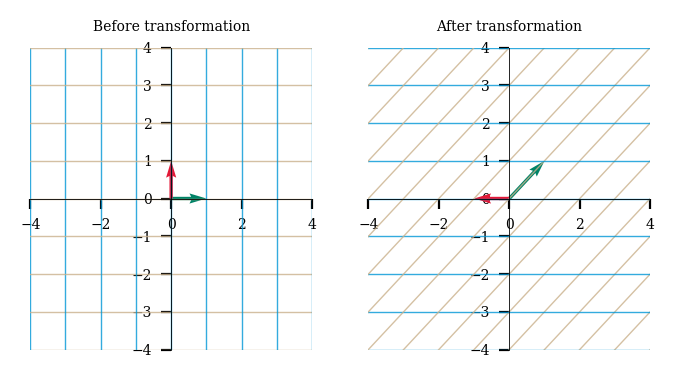

In [30]:
plot_linear_transformation(shear@rotation)

##### Key idea:

> Matrix multiplication corresponds to composition of linear transformations, i.e., applying two transformations in sequence.

This view of matrix multiplication will save you from a lot of unnecessary memorization. It also illuminates the properties of matrix multiplications. For example, is it the same to apply shear and *then* rotate, instead of the other way around? 

This is the same question as asking if matrix multiplication is commutative. Is $SR$ the same as $RS$?

We have a helper function that plots the grid lines on a plane after two transformations in sequence. Let's try it with $S$ and $R$ in swapped orders.

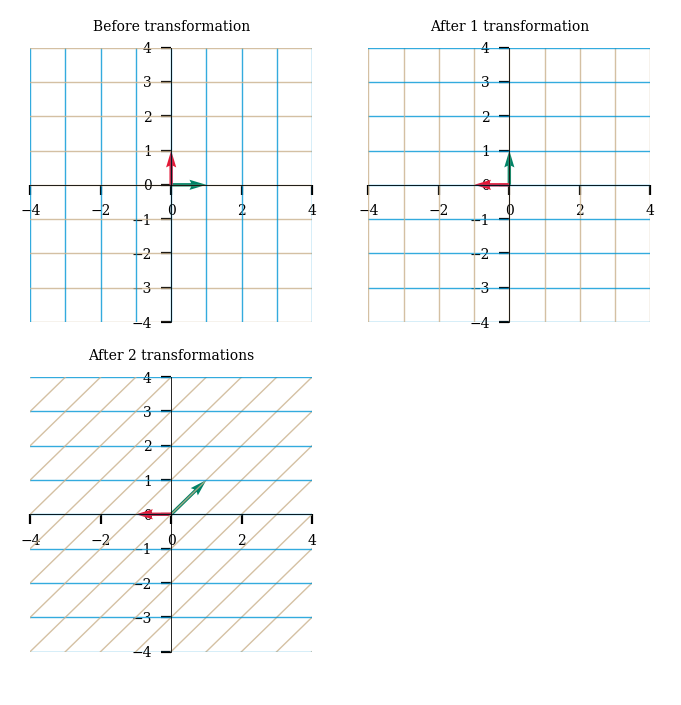

In [31]:
# the order of transformation: from right to left
plot_linear_transformations(rotation, shear) 

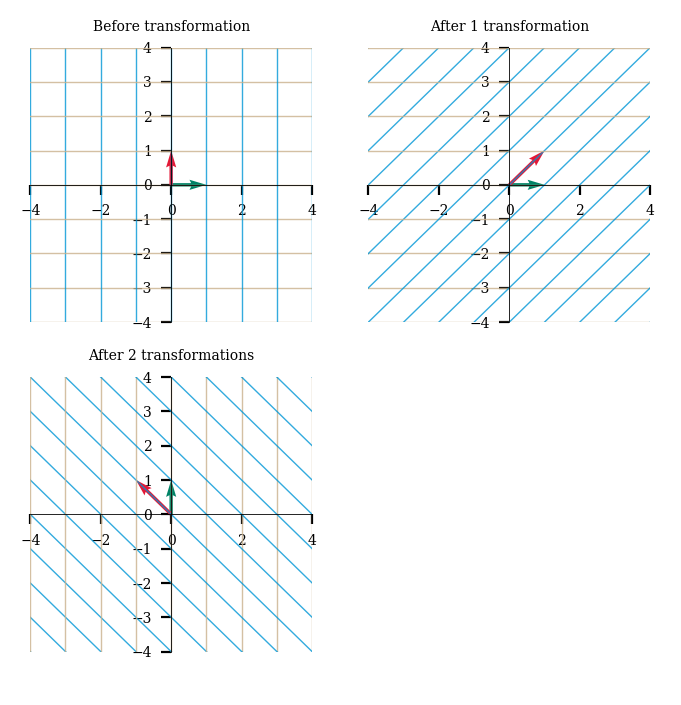

In [32]:
plot_linear_transformations(shear, rotation) 

Nope. The result is not the same. The order of transformations matters and **matrix mulitiplication is not commutative** (in general).

Episode four of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) beautifully illustrates the key idea of matrix multiplication as composition of linear transformations [4].

## Inverse of a matrix

Thinking of matrices as linear transformations also helps demistify the idea of an **inverse**. We won't go into details here, but imagine that you apply two transformations in sequence, and every vector in 2D space ends up just where it started. Well, that can happen when one transformation undoes the previous one. This means that the second transformation is the inverse of the first.

NumPy has great built-in Linear Algebra capabilities in the `numpy.linalg` module. Among its many functions, we get [`inv()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.inv.html), to compute the inverse of a matrix. So we can try right away to visualize a sequence of transformations: first with the matrix $M$, then the inverse of $M$. Check it out.

In [33]:
from numpy.linalg import inv

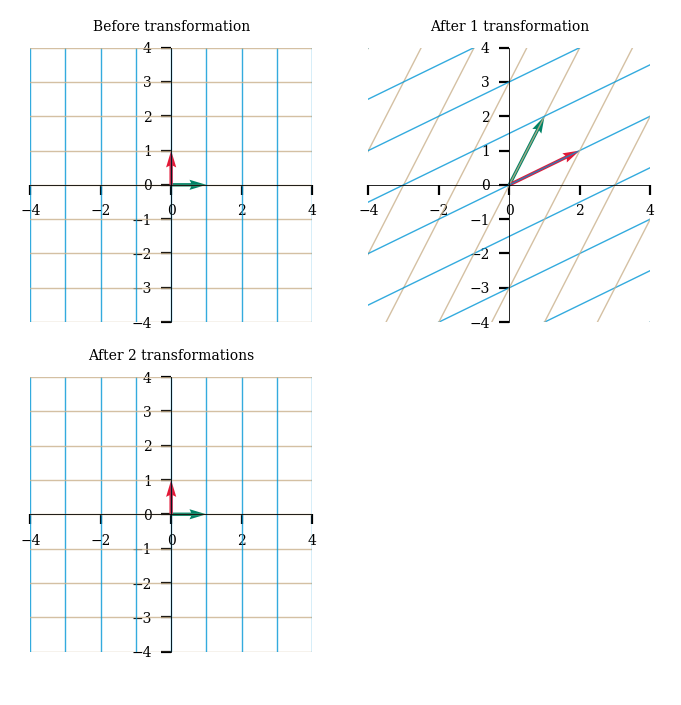

In [34]:
M = numpy.array([[1,2], [2,1]])
M_inv = inv(M)
plot_linear_transformations(M, M_inv)

The combined action of the linear transformation $M$ and its inverse $M^{-1}$ is to leave every vector the same. In other words, the matrix multiplication $M^{-1}M$ is equal to the identity $I$.

## What we've learned

- What is a vector.
- The two fundamental vector operations: vector addition and scaling.
- The concept of basis vectors.
- Making a linear combination of vectors; the concept of span.
- When a set of vectors is linearly independent.
- A matrix is a linear transformation.
- Matrix-vector multiplication: a combination of the matrix columns scaled by the vector components.
- Some special transformations: rotation, shear, scaling, identity.
- Matrix-matrix multiplication: composition of linear transformations.
- Idea of the matrix inverse: the transformation that reverses the effect of another.

## References

1. Vectors, what even are they? Essence of linear algebra, chapter 1. Video at https://youtu.be/fNk_zzaMoSs (2016), by Grant Sanderson.
2. Linear combinations, span, and basis vectors. Essence of linear algebra, chapter 2. Video at https://youtu.be/k7RM-ot2NWY (2016), by Grant Sanderson.
3. Linear transformations and matrices. Essence of linear algebra, chapter 3. Video at https://youtu.be/kYB8IZa5AuE (2016), by Grant Sanderson.
4. Matrix multiplication as composition. Essence of linear algebra, chapter 4. Video at https://youtu.be/XkY2DOUCWMU (2016), by Grant Sanderson.

In [35]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())